In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime

In [3]:
kc_data=pd.read_csv("kc_house_data.csv")

In [4]:
kc_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Dropping irrelevant features such as latitude longitude zipcode

In [5]:
kc_data=kc_data.drop(['id','zipcode','lat','long'],axis=1)
kc_data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287


## Building useful features

In [6]:
kc_data.date=pd.to_datetime(kc_data.date)
#kc_data.yr_built=pd.to_datetime(kc_data.yr_built)
#kc_data.date,kc_data.yr_built

In [7]:
kc_data['Age']=kc_data['date'].dt.year-kc_data['yr_built']
kc_data.drop(['date'],inplace=True,axis=1)

In [8]:
kc_data.drop('yr_built',inplace=True,axis=1)

In [9]:
kc_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,Age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,1340,5650,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1991,1690,7639,63
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,0,2720,8062,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,1360,5000,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,0,1800,7503,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,0,1530,1509,5
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,0,1830,7200,1
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,0,1020,2007,5
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,0,1410,1287,11


In [10]:
kc_data['Renovated']=kc_data.yr_renovated.apply(lambda x:0 if x==0 else 1)
kc_data.drop('yr_renovated',axis=1,inplace=True)

In [11]:
kc_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,Age,Renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,59,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,63,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,49,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,1530,1509,5,0
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,1830,7200,1,0
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,1020,2007,5,0
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,1410,1287,11,0


## Saving the cleaned data

In [12]:
kc_data.to_csv("prepared_kc_county_data.csv")

## Plotting to see the relationships

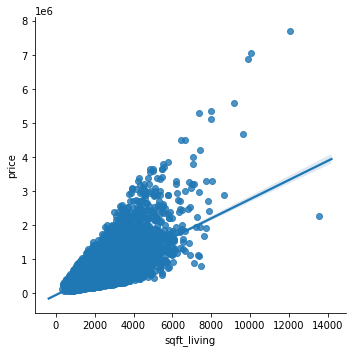

In [13]:
sns.lmplot('sqft_living','price',data=kc_data)

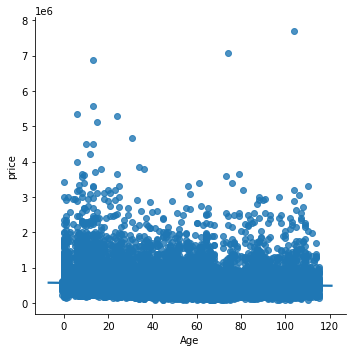

In [14]:
sns.lmplot('Age','price',data=kc_data)

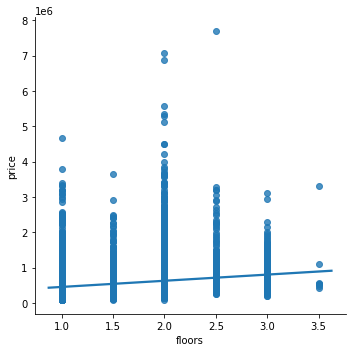

In [15]:
sns.lmplot('floors','price',data=kc_data)

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Experimenting with only one feature

In [17]:
x=kc_data[['sqft_living']]
y=kc_data[['price']]
x,y

(       sqft_living
 0             1180
 1             2570
 2              770
 3             1960
 4             1680
 ...            ...
 21608         1530
 21609         2310
 21610         1020
 21611         1600
 21612         1020
 
 [21613 rows x 1 columns],           price
 0      221900.0
 1      538000.0
 2      180000.0
 3      604000.0
 4      510000.0
 ...         ...
 21608  360000.0
 21609  400000.0
 21610  402101.0
 21611  400000.0
 21612  325000.0
 
 [21613 rows x 1 columns])

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17290, 1), (4323, 1), (17290, 1), (4323, 1))

In [19]:
scaler=StandardScaler()
x_train.shape

(17290, 1)

In [20]:
x_train=scaler.fit_transform(x_train)
x_train

array([[-1.20850241],
       [-0.04678505],
       [-0.27478566],
       ...,
       [ 1.24521836],
       [-0.16621394],
       [-1.04564484]])

In [21]:
regressor=LinearRegression()
model=regressor.fit(x_train,y_train)
y_pred=model.predict(x_test)


In [23]:
y_pred=y_pred/1000

In [24]:
y_pred

array([[534019.70146925],
       [619896.64128892],
       [619896.64128892],
       ...,
       [838492.48810263],
       [843697.151122  ],
       [549633.69052737]])

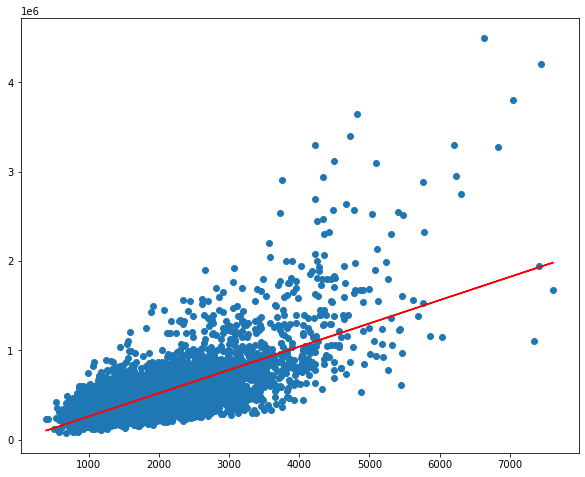

In [25]:
plt.figure(figsize=(10,8))
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,c='r')
#regressor.score(y_pred,y_test)

In [26]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.48751653133163664

## With One feature we were able to achieve result of 48% accuracy
## Now we shall look at selecting 'k' best features

In [34]:
from sklearn.feature_selection import f_regression,mutual_info_regression,SelectKBest

In [35]:
features=kc_data.drop('price',axis=1)

In [36]:
target=kc_data['price']

In [75]:
select_univariate=SelectKBest(f_regression,k=3).fit(features,target)

In [76]:
feature_mask=select_univariate.get_support()
feature_mask

array([False, False,  True, False, False, False, False, False,  True,
        True, False, False, False, False, False])

In [77]:
selected_columns=features.columns[feature_mask]
selected_columns

Index(['sqft_living', 'grade', 'sqft_above'], dtype='object')

In [78]:
selected_features=features[selected_columns]

In [79]:
from sklearn.preprocessing import scale
x=pd.DataFrame(data=scale(selected_features),columns=selected_columns)
y=target

In [80]:
x.describe()

,sqft_living,grade,sqft_above
count,2.161300e+04,2.161300e+04,2.161300e+04
mean,2.419652e-16,2.524855e-16,1.104624e-16
std,1.000023e+00,1.000023e+00,1.000023e+00
min,-1.948891e+00,-5.663344e+00,-1.809494e+00
25%,-7.108948e-01,-5.588357e-01,-7.226314e-01
50%,-1.849914e-01,-5.588357e-01,-2.758102e-01
75%,5.118578e-01,2.919156e-01,5.091458e-01
max,1.247807e+01,4.545672e+00,9.204044e+00


In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [103]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
y_pred=model.predict(x_test)

In [105]:
df=pd.DataFrame({'test': y_test ,\
                'pred': y_pred})
df

,test,pred
9,323000.0,416607.354122
17632,748000.0,668503.846683
2601,381500.0,257653.764467
18059,275000.0,-18722.805686
977,237500.0,281737.641687
...,...,...
6061,199000.0,318666.253425
1200,254000.0,517867.027460
20189,730000.0,938639.471923
2003,560000.0,417854.182640


In [114]:
y_pred=y_pred.reshape(-1,1)

In [115]:
from sklearn.metrics import accuracy_score

In [117]:
train_score=model.score(x_train,y_train)
test_score=model.score(x_test,y_test)
#r2_score(y_test.to_numpy(),y_pred)
#model.score(y_pred,y_test)

In [118]:
train_score,test_score

(0.5394369386490712, 0.5475395046830733)